In [4]:
#Lapsed donors on this dataset are from the promotion nº 2, 17NK (from Forums)
#data['RFA_2R'].value_counts()

In [5]:
#2017-06-01 is the most recent date on ADATE2 -> use this one

# Data Mining Project
Group members: <br>
Bruno Belo <br>
Rui Monteiro <br>
Tomás Santos

## 1. Import and assessing data

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import ceil
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Goes to the previous folder, accesses the data folder, and gets the path to the donors.csv file (this is done bc the  
# file is too large to upload on GitHub)
path = os.path.join('..', 'data', 'donors.csv')

data = pd.read_csv(path, sep = ',')

data.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,...,7.741935,95515,0,L,4,E,X,X,X,C
1,1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2,2010-01-01,AMH,1,NC,27017,,,NaN,0,...,7.481481,15078,1,L,4,E,X,X,X,C
3,3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,...,6.812500,172556,1,L,4,E,X,X,X,C
4,4,2006-01-01,,0,FL,33176,,,1940-01-01,0,...,6.864865,7112,1,L,2,F,X,X,X,A


In [8]:
# Get a copy of the original dataset
data_original = data.copy()

In [9]:
# Optional -> to check all the columns or rows
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [10]:
# Dimension of the dataset
data.shape

(95412, 476)

In [11]:
# Data types of the variables and columns
data.dtypes

Unnamed: 0     int64
ODATEDW       object
OSOURCE       object
TCODE          int64
STATE         object
               ...  
RFA_2A        object
MDMAUD_R      object
MDMAUD_F      object
MDMAUD_A      object
GEOCODE2      object
Length: 476, dtype: object

In [12]:
# Summary Statistics of our variables
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,95412,NaN,NaN,NaN,47705.5,27543.2,0,23852.8,47705.5,71558.2,95411
ODATEDW,95412,54,2015-01-01,15358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OSOURCE,95412,896,MBC,4539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCODE,95412,NaN,NaN,NaN,54.2231,953.844,0,0,1,2,72002
STATE,95412,57,CA,17343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
RFA_2A,95412,4,F,46964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDMAUD_R,95412,5,X,95118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDMAUD_F,95412,4,X,95118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDMAUD_A,95412,5,X,95118,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Info on the donors dataset
data.info(max_cols=476)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 476 columns):
Unnamed: 0    95412 non-null int64
ODATEDW       95412 non-null object
OSOURCE       95412 non-null object
TCODE         95412 non-null int64
STATE         95412 non-null object
ZIP           95412 non-null object
MAILCODE      95412 non-null object
PVASTATE      95412 non-null object
DOB           71529 non-null object
NOEXCH        95412 non-null object
RECINHSE      95412 non-null object
RECP3         95412 non-null object
RECPGVG       95412 non-null object
RECSWEEP      95412 non-null object
MDMAUD        95412 non-null object
DOMAIN        95412 non-null object
HOMEOWNR      95412 non-null object
CHILD03       95412 non-null object
CHILD07       95412 non-null object
CHILD12       95412 non-null object
CHILD18       95412 non-null object
NUMCHLD       12386 non-null float64
INCOME        74126 non-null float64
GENDER        95412 non-null object
WEALTH1       50680 non-nu

In [14]:
# Check duplicates
any(data.duplicated())

False

In [15]:
# Count of missing values
data.isna().sum()

Unnamed: 0      0
ODATEDW         0
OSOURCE         0
TCODE           0
STATE           0
             ... 
RFA_2A          0
MDMAUD_R        0
MDMAUD_F        0
MDMAUD_A        0
GEOCODE2      132
Length: 476, dtype: int64

## 2. Data Treatment

In [16]:
# Ver no coherence:
# O LASTDATE é o resumo das campanhas, mas como a ultima data das campanhas está, várias vezes, incoerente com as RDATE, e
# e tendo em conta que estas têm muitos missing values (algumas mais de 70%), decidimos dropar as RDATE. Assumimos, tbm, 
# que há muitos valores que podem ter sido inseridos manualmente, o que leva às incoerências.

In [17]:
#CONTROLN: stays as index of the dataset
data.set_index('CONTROLN', inplace=True)

In [18]:
#Problema pa depois:

#put aside the variables that are already related to a PVA's clustering, and may be used in the end to compare it to our
#solution...:
donors_pva_cluster = data[['MDMAUD', 'DOMAIN', 'GEOCODE', 'PEPSTRFL']].copy()

#MDMAUD: RFA field, already a clustering from the organization

#put this aside because it is clustering (this one is a bit different from the RFA variables)
#donors_pva_cluster.replace({'DOMAIN' : {' ' : np.nan}}, inplace = True)

#GEOCODE is what? Put aside for now - clustering
#donors_pva_cluster.replace({'GEOCODE' : {' ' : np.nan}}, inplace = True)

#probably put aside! bc it's related to RFA
#donors_pva_cluster.replace({'PEPSTRFL' : {'X' : '1', ' ' : '0'}}, inplace = True)

rfa1 = data.loc[:, 'RFA_2':'RFA_24'].copy()
donors_pva_cluster = pd.merge(donors_pva_cluster, rfa1, left_index=True, right_index=True)
#from RFA_2 to RFA_24: these are variables with a clustering solution from PVA; don't use them for now (maybe use them
#in the end to compare with our own clustering solution)

rfa_and_mdmaud = data.loc[:, 'RFA_2R':'MDMAUD_A'].copy()
donors_pva_cluster = pd.merge(donors_pva_cluster, rfa_and_mdmaud, left_index=True, right_index=True)
#RFA_2R, RFA_2F, RFA_2A are related to RFA (put aside for now?)
#MDMAUD_R, MDMAUD_F, MDMAUD_A are related to RFA (put aside for now?)

donors_pva_cluster.head()

,MDMAUD,DOMAIN,GEOCODE,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,...,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,XXXX,T2,,X,L4E,S4E,S4E,S4E,S4E,S4E,...,S4E,S4E,S4E,S4E,L,4,E,X,X,X
148535,XXXX,S1,02,,L2G,A2G,A2G,A2G,A2G,A1E,...,N1E,N1E,,F1E,L,2,G,X,X,X
15078,XXXX,R2,,X,L4E,S4E,S4E,S4E,S4E,S4F,...,,S4D,S4D,S3D,L,4,E,X,X,X
172556,XXXX,R2,,X,L4E,S4E,S4E,S4E,S4E,S4E,...,A1D,A1D,,,L,4,E,X,X,X
7112,XXXX,S2,,,L2F,A2F,A2F,A2F,A1D,I2D,...,A3D,I4E,A3D,A3D,L,2,F,X,X,X


In [19]:
#drop these:
data.drop(columns = ['Unnamed: 0',
                     'NOEXCH',
                     'WEALTH1',
                     'DATASRCE',
                     'LIFESRC'], inplace = True)

#Unnamed: 0: it has indexes from 0 to 95412, it's redundant

#NOEXCH: this var. has inconsistencies with the metadata available, as there's no reference to '0', '1', 0 or 1 values
#BELO - COHERENCE
#drop this! (incoherent, bc the variable has many incoherences with the metadata -> explicar melhor no relatório)
#data['NOEXCH'].value_counts()

#WEALTH1 has similar values to WEALTH2 but the metadata does not specify what is the variable, so we decided to keep
#the WEALTH2, which is well described
#data = data.astype({"WEALTH1": object})
#data['WEALTH1'].unique()

#data['DATASRCE'].unique()
#data.replace({'DATASRCE' : {' ' : np.nan}}, inplace = True)
#says which was the source of the data in this section of variables; it has 21280 ' ' (blanks)
#DROP! bc the variable is not very useful for interpreting the clusters (we are not sure about what are the values 
#representing... companies? we could not find on the internet)

#LIFESRC: same as DATASRCE...
#data['LIFESRC'].value_counts()
#data.replace({'LIFESRC' : {' ' : np.nan}}, inplace = True)
#says which was the source of the data in this section of variables; it has 54032 ' ' (blanks)
#DROP! bc the variable is not very useful for interpreting the clusters (we are not sure about what are the values 
#representing... companies? we could not find on the internet)

#We decided to drop all ADATE_x; RDATE_x and RAMNT_x bc they are incoherent with the summary variables.
#The code showing why we think these are incoherent is on the Coherence Check phase.

# Drop all 'ADATE_x' - We do not drop ADATE_2 to use it for calculating who are and who aren't the lapsed donors on the 
# dataset
data = data.drop(columns = data.loc[:,'ADATE_3':'ADATE_24'].columns)

# Drop all 'RDATE_x' and all 'RAMNT_x'
data = data.drop(columns = data.loc[:,'RDATE_3':'RAMNT_24'].columns)

In [20]:
#drop variables on the extra dataframe that has the clustering from PVA (donors_pva_cluster)
data.drop(columns = donors_pva_cluster.columns, inplace = True)

In [21]:
#note -> 'NUMCHLD' : int, altough it cannot be converted due to NaNs (float)!
data = data.astype({'TCODE': object, 
                    'INCOME': object,
                    'WEALTH2': object,
                    'MSA': object,
                    'ADI': object,
                    'DMA': object,
                    'HPHONE_D': object})

#INCOME: from the Forums: 7 corresponds to the highest income group and 0 to the lowest one

#MSA has values 0, which is not a MSA code. After researching what does this code represent in the US census, we assume 
#those 0s are for the doners that do not live in a metropolitan statistical area (MSA), a region with at least one 
#urbanized area and a minimum population of 50 000 (Investopedia); so those people may live in towns or rural areas.

#ADI has values 0, which is not an ADI code. After researching what does this code represents, we assume 
#those 0s are for the doners that do not live in a radio or television market region in which that specific population 
#receives the same programming (https://www.insightsassociation.org/issues-policies/glossary/area-dominant-influence-adi);
#this is related to marketing, and those people may live in regions that are not assigned to a code (but this is not a 
#missing value!).

#DMA has values 0, which is not a DMA code. After researching what does this code represents, we assume 
#those 0s are for the doners that do not live in a geographic area in the United States in which local television viewing 
#is measured by Nielsen (https://www.nielsen.com/us/en/intl-campaigns/dma-maps/#:~:text=DMA%20(Designated%20Market%20Area)%20regions,geographic%20areas%20within%20their%20business.)
#again, this code is related to marketing, and those people may live in regions that are not assigned to a code (but this 
#is not a missing value!).

#HPHONE_D is binary (0 or 1)

In [22]:
#dates as string, now as datetimes
#note -> errors='coerce' as in the vast majority of records (if not always) the errors on the to_datetime function are
#rased because the string in the column is empty, thus there isn't a date there; this leads to an error, and with this
#argument definition, the invalid parsing will be set as NaT (Not a Time), which is what we intend (missing values stay
#missing)
data['ODATEDW'] = pd.to_datetime(data['ODATEDW'])
data['DOB'] = pd.to_datetime(data['DOB'], errors='coerce')
#data.loc[:, 'ADATE_2':'ADATE_24'] = data.loc[:, 'ADATE_2':'ADATE_24'].apply(pd.to_datetime, errors='coerce') #from ADATE_2 until ADATE_24
data['MAXADATE'] = pd.to_datetime(data['MAXADATE'])
#data.loc[:, 'RDATE_3':'RDATE_24'] = data.loc[:, 'RDATE_3':'RDATE_24'].apply(pd.to_datetime, errors='coerce') #from RDATE_3 until RDATE_24
data['MINRDATE'] = pd.to_datetime(data['MINRDATE'])
data['MAXRDATE'] = pd.to_datetime(data['MAXRDATE'])
data['LASTDATE'] = pd.to_datetime(data['LASTDATE'])
data['FISTDATE'] = pd.to_datetime(data['FISTDATE'], errors='coerce')
data['NEXTDATE'] = pd.to_datetime(data['NEXTDATE'], errors='coerce')

In [23]:
#to remove the hyphen from the end of the ZIP codes (US zip codes are not supposed to have hyphens, but some do!)
data['ZIP'] = data['ZIP'].map(lambda x: x.replace('-', ''))

#now, the replace: on some vars. swap a blank space for a NaN, on binaries swap the letters for '0' and '1', etc
data.replace({'OSOURCE' : {' ' : np.nan},
                'MAILCODE' : {' ' : '0', 'B' : '1'},
                'PVASTATE' : {' ' : 'N'}, #N = state is not served by any organization
                'RECINHSE' : {' ' : '0', 'X' : '1'},
                'RECP3' : {' ' : '0', 'X' : '1'},
                'RECPGVG': {' ' : '0', 'X' : '1'},
                'RECSWEEP': {' ' : '0', 'X' : '1'},
                'HOMEOWNR' : {' ' : '0', 'H' : '1', 'U' : '0'}, #we assume the blank space on this variable says that it is unknown wether the donor has or not a home (so, we joined it with the 0-Unkwown)
                'CHILD03' : {' ' : 'N'}, #the ' ' (blank) will be replaced by 'N' (N = None), as we assume the blank space in this variable means the donor has no 
                'CHILD07' : {' ' : 'N'}, #children in that specific range of ages
                'CHILD12': {' ' : 'N'},  #note: more than 90 000 records have None, on each of these 4 variables
                'CHILD18': {' ' : 'N'},
                'NUMCHLD': {np.nan : 0}, #assuming NaN is zero, bc there is no zero on this variable!?
                'GENDER' : {' ' : 'U', 'A' : 'U', 'C' : 'U'}, #Incoherence (Belo!) -> nem que se fale só no relatório!
                                                             #values 'A' (2 of them) & 'C' (2) are not described on the metadata, most probably those are errors
                                                             #we assume the blank spaces, As and Cs can be assumed to be Unkwown
                'SOLP3' : {' ' : 'Default'},
                'SOLIH' : {' ' : 'Default'}, #feature engineering: create a binary with -> 0 (can't be mailed), 1 (can be mailed)
                'MAJOR' : {' ' : '0', 'X' : '1'},
                'GEOCODE2' : {' ' : np.nan}}, inplace = True)

#assuming Y = Yes and N = No, on all these vars
data.loc[:, 'COLLECT1':'PLATES'] = data.loc[:, 'COLLECT1':'PLATES'].replace({'Y' : '1', ' ' : '0'}) #from COLLECT1 to PLATES

In [24]:
#after the previous cell, we can put NUMCHLD as int:
data = data.astype({'NUMCHLD': int})

data['NUMCHLD'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [25]:
#PROBLEM on HHP1 and HHP2: "Median Person Per Household" and "Average Person Per Household" but the values are bery high
#if we interpret this as the median/average number of people living in a household of the neighborhood, then it should
#have values between 1, 2 or 3. Not 100-700. (Incoherence - Belo?)



#perguntar ao professor!!
#decisão final: (nota: ainda há alguns valores iguais a 0)
data['HHP1'] = data['HHP1'] / 100
data['HHP2'] = data['HHP2'] / 100

In [26]:
#RHP1 to RHP4 are kinda weird (Housing Unit??)



#perguntar ao professor: média/mediana das pessoas ser tão alto (50?); ou a descrição da variável não está correta?
#decisão final: we assume this values were multiplied by 10 to avoid storing floats (floats make up more space on data
#files), so we divided this columns by 10, for the values to make more "sense"
data['RHP1'] = data['RHP1'] / 10
data['RHP2'] = data['RHP2'] / 10
data['RHP3'] = data['RHP3'] / 10
data['RHP4'] = data['RHP4'] / 10

In [27]:
#EC1: "Median Years of School Completed by Adults 25+" has minimum 89 and maximum 170... are the values wrong?

#HC1: "Percent Median Length of Residence" is percent and median at the same time? And has values of 0 length! Is it the 
#median time someone has been living in their current home, in years? Very ambiguous:
#HC2: this one has a less ambiguous description but it still says "Percent Median" so is it a percentage or a median? 
#it is confusing


#perguntar ao professor: EC1 (mediana de 170 anos a estudar?):
#decisão final: divided by 10, because 8.9 (min) and 17.0 (max) are values that make more sense
#we assume this values were multiplied by 10 to avoid storing floats (floats make up more space on data
#files), so we divided this columns by 10, for the values to make more "sense"
data['EC1'] = data['EC1'] / 10
#HC1 e HC2 -> we assume this is a median, the "percent" is probably a typo on the metadata descriptions

After the Data Treatment:

In [28]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,RECINHSE,RECP3,...,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,HPHONE_D,GEOCODE2
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,2009-01-01,GRI,0,IL,61081,0,N,1957-12-01,0,0,...,12.0,2014-02-01,10.0,2015-12-01,2009-11-01,2010-03-01,4.0,7.741935,0,C
148535,2014-01-01,BOA,1,CA,91326,0,N,1972-02-01,0,0,...,25.0,2015-12-01,25.0,2015-12-01,2013-10-01,2015-04-01,18.0,15.666667,0,A
15078,2010-01-01,AMH,1,NC,27017,0,N,NaT,0,0,...,16.0,2012-07-01,5.0,2015-12-01,2010-01-01,2011-01-01,12.0,7.481481,1,C
172556,2007-01-01,BRY,0,CA,95953,0,N,1948-01-01,0,0,...,11.0,2014-11-01,10.0,2015-12-01,2007-02-01,2007-11-01,9.0,6.812500,1,C
7112,2006-01-01,NaN,0,FL,33176,0,N,1940-01-01,1,1,...,15.0,2016-01-01,15.0,2016-01-01,1999-03-01,2000-05-01,14.0,6.864865,1,A


In [29]:
data.info(max_cols=371)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 95515 to 185114
Data columns (total 371 columns):
ODATEDW     95412 non-null datetime64[ns]
OSOURCE     94484 non-null object
TCODE       95412 non-null object
STATE       95412 non-null object
ZIP         95412 non-null object
MAILCODE    95412 non-null object
PVASTATE    95412 non-null object
DOB         71529 non-null datetime64[ns]
RECINHSE    95412 non-null object
RECP3       95412 non-null object
RECPGVG     95412 non-null object
RECSWEEP    95412 non-null object
HOMEOWNR    95412 non-null object
CHILD03     95412 non-null object
CHILD07     95412 non-null object
CHILD12     95412 non-null object
CHILD18     95412 non-null object
NUMCHLD     95412 non-null int32
INCOME      74126 non-null object
GENDER      95412 non-null object
HIT         95412 non-null int64
MBCRAFT     42558 non-null float64
MBGARDEN    42558 non-null float64
MBBOOKS     42558 non-null float64
MBCOLECT    42498 non-null float64
MAGFAML     42558

In [30]:
#'HIT' is good to go

In [31]:
#from MBCRAFT to PUBOPP, it all looks good; but it has many missing values!

In [32]:
#from MALEMILI to FEDGOV there are no MVs and everything is fine (check for incoherences: percentages below 0 or 
#above 100?)

In [33]:
#from POP901 until the end of this set of variables, we assume 0s in the first three (Number of Persons, Families and 
#Households) represent people that live in rural areas and small towns, with no one living near them (in the neighborhood)

#gets resolved when we do data = data[data['AGE902'] != 0] (Coherence checks!)

In [34]:
#from POP901 until ETH16, everything looks fine

In [35]:
#PROBLEM on HV1 & HV2: "Median Home Value in hundreds" has values of 0, and then, the second lowest, 75 (which means 7500) 
#the values of 0 are 318 records - same on HV2



#perguntar ao professor: nestas variáveis, assumimos que os 0s são missings, incoerências, ou representam casas alugadas.
#decisão final:
#assumption -> there were homes with very low market values, so when the values where divided by 100 to get the value for 
#the column, it was so close to 0 that the int was 0

In [36]:
#HV3 and HV4, related to rents, also have values 0 but that can mean the people are not paying any rent (maybe they bought
#the house already, or maybe they live with family members and are not paying, etc)

In [37]:
#IC1-IC5: values 0 -> don't declare anything to the state?

In [38]:
#data['TPE10'] has values of 0: people that work at home or live very near to the company/office/...

In [39]:
#from RAMNT_3 until RAMNT_24 -> explicado na parte do Tomás

## 3. Creation of new variables (before Feature Engineering)

We need it for the outlier removal and for the MVs (dates in days or years), bc it is more straightforward than working with datetimes (also for the visualizations).

The date used for calculating these and the lapsed donors was 2017-06-01, the most recent date on the ADATE_2, from the NK17 promotion (most recent promotion).

In [40]:
data['ODATEDW_days'] = (datetime(2017, 6, 1) - data['ODATEDW']).dt.days

#AGE needs to be int after being imputed
data['AGE'] = ((datetime(2017, 6, 1) - data['DOB']).dt.days / 365).map(lambda x: math.floor(x) if math.isnan(x) == False else x)

#from ADATE_3 until ADATE_24 -> droped

data['MAXADATE_days'] = (datetime(2017, 6, 1) - data['MAXADATE']).dt.days

#from RDATE_3 until RDATE_24 -> droped

data['MINRDATE_days'] = (datetime(2017, 6, 1) - data['MINRDATE']).dt.days

data['MAXRDATE_days'] = (datetime(2017, 6, 1) - data['MAXRDATE']).dt.days

data['LASTDATE_days'] = (datetime(2017, 6, 1) - data['LASTDATE']).dt.days

data['FISTDATE_days'] = (datetime(2017, 6, 1) - data['FISTDATE']).dt.days

data['NEXTDATE_days'] = (datetime(2017, 6, 1) - data['NEXTDATE']).dt.days

#NOTE: some of these int variables have type float due to NaNs, change later (after imputing MVs)

In [41]:
# Drop the datetimes, and keep the variables created previously!
data = data.drop(columns = data.loc[:, np.array(data.dtypes == "datetime64[ns]")].columns)

## 4. Data Visualization

In [42]:
# Define metric and non metric
non_metric_vars = data.loc[:, np.array(data.dtypes=="object")].copy()
metric_vars = data.loc[:, ~data.columns.isin(non_metric_vars)].copy()

KeyboardInterrupt: 

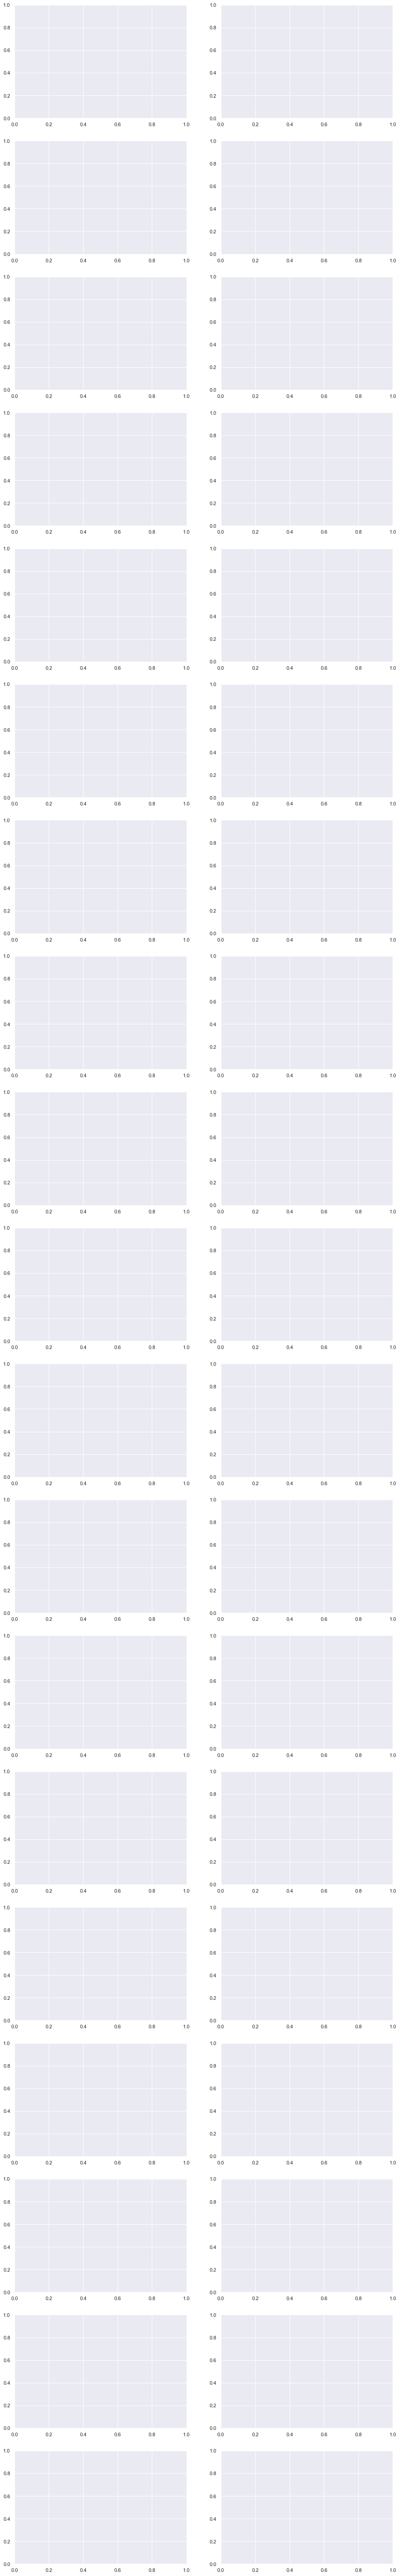

In [43]:
# Metric Variables Histograms 
sns.set()

# Create individual axes 
fig, axes = plt.subplots(ceil(len(metric_vars.columns)/2), 2, figsize=(15, 900))
#plt.subplots_adjust(hspace = 0.18)

# Plot data
for ax, feat in zip(axes.flatten(), metric_vars.columns):
    ax.hist(metric_vars[feat])
    ax.set_title(feat, y = -0.16)
    
# Title
plt.suptitle("Metric variables' histograms", fontsize=25)
  
plt.show()

In [ ]:
# Non Metric Variables' barplots
sns.set()

non_metric_vars_plot = non_metric_vars.drop(columns=['OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MSA', 'ADI', 'DMA'])

# Prepare figure. Create individual axes where each histogram will be placed.
# OSOURCE, TCODE, STATE, ZIP, MSA, ADI and DMA have too many classes, it is not possible to visualizate it!
fig, axes = plt.subplots(ceil(len(non_metric_vars_plot.columns)/2), 2, figsize=(13, 100))
plt.subplots_adjust(hspace = 0.18)

# Plot data
for ax, feat in zip(axes.flatten(), non_metric_vars_plot.columns):
    sns.countplot(x=non_metric_vars[feat], ax=ax)
    
# Title
plt.suptitle("Non-metric variables' barplots", fontsize=25)

plt.show()

In [ ]:
#NÃO FUNCIONA!

sns.set(style="whitegrid")

plot_features = metric_vars.columns

#Prepare figure layout
#fig, axes = plt.subplots(ceil(len(metric_vars.columns)/2), 2, figsize=(15, 900), constrained_layout=True)
fig, axes = plt.subplots(10, 2, figsize=(15, 30),  constrained_layout=True)
#fig, axes = plt.subplots(1, len(plot_features), figsize=(15,8), constrained_layout=True)
 
# Draw the boxplots
for i in zip(axes, plot_features):
    sns.boxplot(data=metric_vars.loc[metric_vars["variable"]==i[1]], x="variable", y="value", ax=i[0])
    i[0].set_xlabel("")
    i[0].set_ylabel("")

# Finalize the plot
plt.suptitle("Metric variables' box plots", fontsize=25)
sns.despine(bottom=True)

plt.show()

In [ ]:
# # Metric Variables Correlation Matrix - DEMORA DEMASIADO TEMPO!?
# sns.set(style="white")

# # Compute the correlation matrix
# corr = metric_vars.corr() #Getting correlation of numerical variables

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
# mask[np.triu_indices_from(mask)] = True #The upper-triangle array is now composed by True values

# # Set up the matplotlib figure
# fig, ax = plt.subplots(figsize=(12, 8))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True) #Make a diverging palette between two HUSL colors. Return a matplotlib colormap object.

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, ax=ax)

# # Layout
# plt.subplots_adjust(top=0.95)
# plt.suptitle("Correlation matrix", fontsize=25)
# plt.yticks(rotation=0)

# # Fixing the bug of partially cut-off bottom and top cells
# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t) # update the ylim(bottom, top) values
# plt.show()

In [ ]:
# Metric Variables Correlation Matrix
def color_red_or_green(val):
    if val < -0.7:
        color = 'background-color: red'
    elif val > 0.7:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Checking correlations 
correlations = metric_vars.corr()
correlations.style.applymap(color_red_or_green)

## 5. Coherence Checking

###### STATE has more than 50 states

In [44]:
#it has more than 50 states bc it includes US territories like the Virgin Islands, Northern Mariana Islands, Guam, etc
data_original['STATE'].nunique()

57

###### Are there any donors more recent than the actual date?

In [45]:
data_original['ODATEDW'] = pd.to_datetime(data_original['ODATEDW'])
data_original['DOB'] = pd.to_datetime(data_original['DOB'], errors='coerce')
data_original['ADATE_2'] = pd.to_datetime(data_original['ADATE_2'])
#data.loc[:, 'ADATE_2':'ADATE_24'] = data.loc[:, 'ADATE_2':'ADATE_24'].apply(pd.to_datetime, errors='coerce') #from ADATE_2 until ADATE_24
data_original['MAXADATE'] = pd.to_datetime(data_original['MAXADATE'])
#data.loc[:, 'RDATE_3':'RDATE_24'] = data.loc[:, 'RDATE_3':'RDATE_24'].apply(pd.to_datetime, errors='coerce') #from RDATE_3 until RDATE_24
data_original['MINRDATE'] = pd.to_datetime(data_original['MINRDATE'])
data_original['MAXRDATE'] = pd.to_datetime(data_original['MAXRDATE'])
data_original['LASTDATE'] = pd.to_datetime(data_original['LASTDATE'])
data_original['FISTDATE'] = pd.to_datetime(data_original['FISTDATE'], errors='coerce')
data_original['NEXTDATE'] = pd.to_datetime(data_original['NEXTDATE'], errors='coerce')

In [46]:
#no donors after today's date
(data_original['ODATEDW'] > datetime(2020, 1, 1)).sum()

0

###### NOEXCH incoherent with the metadata

In [47]:
data_original['NOEXCH'].value_counts()
#drop this! (incoherent, bc the variable is not very relevant and it 
#is not consistent with the metadata's variables explanation -> explicar melhor no relatório)

0    61203
0    33882
1      195
1       90
X       35
         7
Name: NOEXCH, dtype: int64

###### GENDER incoherent with the metadata

In [48]:
data_original['GENDER'].value_counts() 
#A and C are incoherent, we will assume as U: Unknown

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

###### Percentages below 0 or above 100?

In [49]:
print('< 0: \n', (data_original.loc[:, 'MALEMILI':'STATEGOV'] < 0).sum(), '\n')
print('> 100: \n', (data_original.loc[:, 'MALEMILI':'STATEGOV'] > 100).sum())

#no incoherence

< 0: 
 MALEMILI    0
MALEVET     0
VIETVETS    0
WWIIVETS    0
LOCALGOV    0
STATEGOV    0
dtype: int64 

> 100: 
 MALEMILI    0
MALEVET     0
VIETVETS    0
WWIIVETS    0
LOCALGOV    0
STATEGOV    0
dtype: int64


In [50]:
pd.set_option('display.max_rows', 500)
(data_original.loc[:, 'POP901':'AC2']).min()
#(data_original.iloc[:, 75:358]).max()

# percentagens sem incoerencias (tudo entre 0-100), nao sei se precisamos incluir

POP901     0.0
POP902     0.0
POP903     0.0
POP90C1    0.0
POP90C2    0.0
POP90C3    0.0
POP90C4    0.0
POP90C5    0.0
ETH1       0.0
ETH2       0.0
ETH3       0.0
ETH4       0.0
ETH5       0.0
ETH6       0.0
ETH7       0.0
ETH8       0.0
ETH9       0.0
ETH10      0.0
ETH11      0.0
ETH12      0.0
ETH13      0.0
ETH14      0.0
ETH15      0.0
ETH16      0.0
AGE901     0.0
AGE902     0.0
AGE903     0.0
AGE904     0.0
AGE905     0.0
AGE906     0.0
AGE907     0.0
CHIL1      0.0
CHIL2      0.0
CHIL3      0.0
AGEC1      0.0
AGEC2      0.0
AGEC3      0.0
AGEC4      0.0
AGEC5      0.0
AGEC6      0.0
AGEC7      0.0
CHILC1     0.0
CHILC2     0.0
CHILC3     0.0
CHILC4     0.0
CHILC5     0.0
HHAGE1     0.0
HHAGE2     0.0
HHAGE3     0.0
HHN1       0.0
HHN2       0.0
HHN3       0.0
HHN4       0.0
HHN5       0.0
HHN6       0.0
MARR1      0.0
MARR2      0.0
MARR3      0.0
MARR4      0.0
HHP1       0.0
HHP2       0.0
DW1        0.0
DW2        0.0
DW3        0.0
DW4        0.0
DW5        0.0
DW6       

###### Strange values on AGE902

In [51]:
#PROBLEM on AGE902: "Median Age of Adults 18 or Older" but it had a value that was 0... actually, after analyzing the 
#subset of donors that had AGE902 equal to 0, we found out that the vast majority of them had also 0 in basically all
#socio-demographic variables. This leads tu belive the missing values on this columns may be represented by a 0 other than
#a Numpy NaN. Anyways, these records have incoherences, and for this reason, they should be removed (799 records!).

#They have donations... but they should be removed anyways.
#dps disto, o MSA, ADI e DMA deixam de ter missings!

#after removing this records, other incoherences in other variables were also removed
data = data[data['AGE902'] != 0]

#also on data_original:
data_original = data_original[data_original['AGE902'] != 0]

#we decided to remove it during the coherence checking because it was affecting more data 
#where you would only find incoherence in this specific donors

###### Strange values on HHP1 and HHP2

In [52]:
print(data_original[['HHP1', 'HHP2']].min(),'\n')
print(data_original[['HHP1', 'HHP2']].max())
#HHP1/2 == 0 doenst make sense
#HHP1/2 == 650/700 how is that possible?? We assume the same as in EC1 so it makes sense to divide each by 100
#(the values zero can not be all true once it may rounded the values down)

HHP1    0
HHP2    0
dtype: int64 

HHP1    650
HHP2    700
dtype: int64


###### Strange values on HV1 to HV4

In [53]:
print(data_original[['HV1', 'HV2', 'HV3', 'HV4']].min())#,'\n', data_original[['HV1', 'HV2', 'HV3', 'HV4']].max())
#HV1/2 - Median and Avg of Home Value == 0 ???
#HV3/4 Median and Avg of contract rent == 0 ???

#PROBLEM on HV1: "Median Home Value in hundreds" has values of 0, and then, the second lowest, 75 (which means 7500)... 
#the values of 0 are incoherences!!? (Belo) (318 records - same on HV2)
#assumption -> there were homes with very low market values, so when the values where divided by 100 to get the value for 
#the column, it was so close to 0 that the int was 0

HV1    0
HV2    0
HV3    0
HV4    0
dtype: int64


###### Strange values on RHP1 to RHP4

In [54]:
print(data_original[['RHP1', 'RHP2', 'RHP3', 'RHP4']].min(),'\n')
print(data_original[['RHP1', 'RHP2', 'RHP3', 'RHP4']].max())

#RHP1/2 Median and Avg of Room per House == 0 ???
#RHP3/4 Median == 10 and Avg == 0 of Persons Per room

#dont make sense to have avg of 0 rooms per housing unit or 0 persons per room

#same.... 

#we can use this data and then in the clustering we just assumed that this values represent low values
#that way we dont need to drop anything or assume this in an incoherence 

#it makes sense that the data was multiplied by 10...but the zeros ??? how to explain ??

#decisão final: we assume this values were multiplied by 10 to avoid storing floats (floats make up more space on data
#files), so we divided this columns by 10, for the values to make more "sense"

#RHP1/2: assume the 0s represent low values, on small homes with a low number of rooms
#RHP3/4: assume the majority of houses in the neighborhood may be empty or with a low number of residents, which "drags"
#the median/mean down to very low values (1 and 0, respectively) 

RHP1     0
RHP2     0
RHP3    10
RHP4     0
dtype: int64 

RHP1    85
RHP2    90
RHP3    61
RHP4    40
dtype: int64


###### Strange values on IC1 to IC5

In [55]:
print(data_original[['IC1', 'IC2', 'IC3', 'IC4', 'IC5']].min(),'\n')
print(data_original[['IC1', 'IC2', 'IC3', 'IC4', 'IC5']].max())

#IC1:5 also doesnt make sense we have avg and medians of value 0
# IC1                         Median Household Income in hundreds
# IC2                         Median Family Income in hundreds
# IC3                         Average Household Income in hundreds
# IC4                         Average Family Income in hundreds
# IC5                         Per Capita Income

# annual values or monthly??

IC1    0
IC2    0
IC3    0
IC4    0
IC5    0
dtype: int64 

IC1      1500
IC2      1500
IC3      1500
IC4      1500
IC5    174523
dtype: int64


In [56]:
#61 have 0 in all these 5 variables
data_original[(data_original['IC1']==0) | (data_original['IC2']==0) | (data_original['IC3']==0) | 
              (data_original['IC4']==0) | (data_original['IC5']==0)].loc[:,'IC1':'IC5']

,IC1,IC2,IC3,IC4,IC5
640,0,0,0,0,1972
2188,0,0,0,0,6972
2604,0,0,0,0,0
3442,0,0,0,0,0
5698,50,0,25,0,1500
6219,138,0,138,0,6575
7200,54,0,75,0,7168
7690,0,0,0,0,0
8417,0,0,0,0,7547
8609,288,0,288,0,29466


In [57]:
#solution: NaNs to fill later
data.loc[data['IC1']==0,'IC1'] = np.nan
data.loc[data['IC2']==0,'IC2'] = np.nan
data.loc[data['IC3']==0,'IC3'] = np.nan
data.loc[data['IC4']==0,'IC4'] = np.nan
data.loc[data['IC5']==0,'IC5'] = np.nan

###### Strange values on EC1

In [58]:
print(data_original[['EC1']].min(),'\n')
print(data_original[['EC1']].max())
#EC1 lowest values == 89 ?? doesnt make any sense but maybe 

#it was multiplied by 10 to save space (not inserted as float)

# EC1 -- 170 years of median, impossible

EC1    89
dtype: int64 

EC1    170
dtype: int64


###### Strange values on MHUC1 and MHUC2

In [59]:
print(data_original[['MHUC1', 'MHUC2']].max())
# MHUC1/2 max value 21/5 values are too low 
# MHUC1                       Median Homeowner Cost w/ Mortgage per Month dollars
# MHUC2                       Median Homeowner Cost w/out Mortgage per Month dollars

MHUC1    21
MHUC2     5
dtype: int64


In [60]:
#solution:
data['MHUC1'] = data['MHUC1']*100
data['MHUC2'] = data['MHUC2']*100

###### Ambiguous metadata descriptions

In [61]:
print(data_original[['HC1', 'HC2']].min(),'\n')
print(data_original[['HC1', 'HC2']].max())
#HC1: "Percent Median Length of Residence" is percent and median at the same time? And has values of 0 length! Is it the 
#median time someone has been living in their current home, in years (assume years)! Very ambiguous:
#HC2: this one has a less ambiguous description but it still says "Percent Median" so is it a percentage or a median? 
#it is confusing

#MEDIAN ONLY, assume both are in years

HC1    0
HC2    0
dtype: int64 

HC1    31
HC2    52
dtype: int64


###### FISTDATE and ODATEDW incoherences

In [62]:
#(data_original['FISTDATE'] < data_original['ODATEDW']).sum()

## FISTDATE < ODATEDW substituir por ODATEDW - incoerencia
# WE ALREADY DECIDED TO KEEP THE ODATEDW WHEN IT'S INCOHERENT
#data.loc[data['FISTDATE_days'] > data['ODATEDW_days'], 'FISTDATE_days']

#nos aqui ja dropamos os FISTDATE por isso temos de corrigir antes
#code:
data.loc[data['FISTDATE_days'] > data['ODATEDW_days'], 'FISTDATE_days'] = data.loc[data['FISTDATE_days'] > data['ODATEDW_days'], 'ODATEDW_days']

#we assumed that the fistdate is from the promotion campaign... but if we have a fistdate before 
#odatedw we will use the the odatedw as fistdate and assume that the original fistdate was wrong manually inserted

###### DOB incoherence

In [63]:
#DOB incoherence
#Assuming we are in 2020 we have donors with less than 18 years (we dont have nothing saying that they must be 18
#so we will keep the variables). What we are going to check is if they have children if they are less than 16

(data_original.loc[:, 'DOB'] > datetime(2020, 1, 1)).sum()
#No DOB after 2020-1-1

0

In [64]:
(data['AGE'] < 18).sum()
#we have 430 donors with less than 18 years

#in our opinion, it does not make sense to have minors as donors, so we will predict a more coherent value for these
#donors' age
data.loc[data['AGE'] < 18, 'AGE'] = np.nan

In [65]:
#at least 26 children under 18 yo have 1 or more child... but we have put NaN, so this issue does not happen anymore on the
#main dataset
child_w_son = data_original.loc[(data_original['DOB'] > datetime(2002, 12, 31)) & (data_original['NUMCHLD'] > 0), 
                                ['DOB', 'NUMCHLD', 'GENDER']]
child_w_son

,DOB,NUMCHLD,GENDER
6892,2010-09-01,1.0,M
6990,2004-08-01,1.0,F
7214,2010-09-01,1.0,F
10687,2007-03-01,3.0,M
11591,2010-02-01,1.0,M
19864,2010-03-01,4.0,F
25211,2010-09-01,1.0,M
25335,2010-08-01,2.0,M
25598,2010-05-01,1.0,M
37897,2010-09-01,1.0,F


##### NUMCHLD and CHILDXX incoherence

In [66]:
#Assuming that when we have: ' ' the donors has no child

data_original.loc[(data_original['CHILD03'] == ' ') & (data_original['CHILD07'] == ' ') & (data_original['CHILD12'] == ' ')
                  & (data_original['CHILD18'] == ' ') & data_original['NUMCHLD'].notna(), ['NUMCHLD']]

#so here we have to assume that numchld represents the number of sons and not the nr of childrens under 18 years old
#otherwise all this rows would be incoherent

,NUMCHLD
4,1.0
12,2.0
17,1.0
24,1.0
25,1.0
...,...
95351,2.0
95352,1.0
95375,1.0
95377,2.0


In [67]:
data_original.loc[((data_original['CHILD03'] != ' ') | (data_original['CHILD07'] != ' ') | (data_original['CHILD12'] != ' ') | (data_original['CHILD18'] != ' ')) 
                  & data_original['NUMCHLD'].isna(), ['NUMCHLD', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18']]

#ALL THIS ROWS ARE INCOHERENT

,NUMCHLD,CHILD03,CHILD07,CHILD12,CHILD18
10,NaN,,,,F
80,NaN,,,M,
85,NaN,,M,F,
152,NaN,,,,F
193,NaN,,,,F
...,...,...,...,...,...
95155,NaN,M,,,
95230,NaN,,,,F
95319,NaN,,,,M
95361,NaN,,,M,


In [68]:
data_original['NUMCHLD'].isnull().sum()

82283

In [69]:
data_original['NUMCHLD'].unique() #we assumed nan is zero childs

array([nan,  1.,  2.,  3.,  4.,  5.,  6.,  7.])

In [70]:
#the way we decided so we could retrieve some info with this variables is to create this binary:
#New column CHILD: 1 has children (filhos) 0 cc
#we will then drop the CHILD and NUMCHLD variables bc the incoherences found are very hard to solve; the way we tried to
#still use this data is to create the new binary variable referred above

data['CHILD'] = '0'
data.loc[(data['CHILD03'] != 'N') | (data['CHILD07'] != 'N') | (data['CHILD12'] != 'N') | (data['CHILD18'] != 'N') | (data['NUMCHLD'] != 0), 'CHILD'] = '1'

In [71]:
##### NUMCHLD and CHILDXX incoherence#droping the incoherent variables
data.drop(columns=['NUMCHLD', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18'], inplace=True)

##### Lapsed donors incoherence

In [72]:
#Lapsed donors made their last donation between 13-24 months ago (390-720 days ago - avg of 30 days per month)

In [73]:
# "Separate" the dataset between lapsed + recent and the remaining
data['LAPSED_OR_RECENT'] = '1'
data.loc[data['LASTDATE_days']>720, 'LAPSED_OR_RECENT'] = '0'

In [74]:
data['LAPSED_OR_RECENT'].value_counts()

1    82968
0    11645
Name: LAPSED_OR_RECENT, dtype: int64

## 6. Feature Engineering

In [75]:
#Nota: Se quisermos meter os outliers noutro df para os classificarmos mais tarde, tem de se criar uma função para criar as
#variáveis, como o David fez

In [76]:
#The features that "translate" the datetimes into days or years were already created above. Also, the binary CHILD was also
#created previously due to an incoherence on other features related to the number of children.

In [77]:
data['HIGHERINCOME']='0'
data['HIGHERINCOME'][data['INCOME']>data['INCOME'].median()]='1'

data['HIGHERWEALTH']='0'
data['HIGHERWEALTH'][data['WEALTH2']>data['WEALTH2'].median()]='1'

#Nota: se usarmos aquele algoritmo nas variáveis binárias, acho que devíamos criar mais binárias como as duas acima!

data['RESPONSESTOOFFERS'] = data['MBCRAFT'] + data['MBGARDEN'] + data['MBBOOKS'] + data['MBCOLECT'] + data['MAGFAML'] + \
data['MAGFEM'] + data['MAGMALE'] + data['PUBGARDN'] + data['PUBCULIN'] + data['PUBHLTH'] + data['PUBDOITY'] + \
data['PUBNEWFN'] + data['PUBPHOTO'] + data['PUBOPP']

data['RESPONSESTOOFFERS_AVG'] = data['RESPONSESTOOFFERS'] / (data['ODATEDW_days'] / 30 / 12)

data['NUMBERINTERESTS'] = data['COLLECT1'].astype(int) + data['VETERANS'].astype(int) + data['BIBLE'].astype(int) + \
data['CATLG'].astype(int) + data['HOMEE'].astype(int) + \
data['PETS'].astype(int) + data['CDPLAY'].astype(int) + data['STEREO'].astype(int) + data['PCOWNERS'].astype(int) + \
data['PHOTO'].astype(int) + data['CRAFTS'].astype(int) + \
data['FISHER'].astype(int) + data['GARDENIN'].astype(int) + data['BOATS'].astype(int) + data['WALKER'].astype(int) + \
data['KIDSTUFF'].astype(int) + data['CARDS'].astype(int) + data['PLATES'].astype(int)

data['CARDPROM_AVG'] = data['CARDPROM'] / (data['ODATEDW_days'] / 30 / 12)

data['NUMPROM_AVG'] = data['NUMPROM'] / (data['ODATEDW_days'] / 30 / 12)

data['RAMNTALL_AVG'] = data['RAMNTALL'] / (data['ODATEDW_days'] / 30 / 12)

data['NGIFTALL_AVG'] = data['NGIFTALL'] / (data['ODATEDW_days'] / 30 / 12)

data['CARDGIFT_AVG'] = data['CARDGIFT'] / (data['ODATEDW_days'] / 30 / 12)

data['TIMELAG2'] = data['ODATEDW_days'] - data['LASTDATE_days']

data['BABYBOOMER_neighbors'] = data['AGEC5'] + data['AGEC6']

data['BABYBOOMER_donor'] = '0'
data.loc[(data['AGE']>=56) & (data['AGE']<=74), 'BABYBOOMER_donor'] = '1'

## 7. Feature Selection

We will do a selection before the outlier removal, to avoid removing records for outliers on variables that will not be used on the cluster analysis and to avoid high dimensionality issues on some of the outlier detection algorithms.

DON'T FORGET <br>
Separate between Lapsed & minus than 390 days since the last donation (1), and the donors with more than 720 days since the last donation (2). <br>
Then, do the same perspectives for each group.

In [145]:
# Split variables into perspectives (with critical thinking and domain knowledge)

social_features = [
    'AGE',
    'MALEMILI',                 
    'MALEVET',
    'VIETVETS',
    'WWIIVETS',
    'POP90C1',
    'POP90C3',
    'POP90C5', #female instead of male
    'AGE901',
    'BABYBOOMER_neighbors',
    'MARR1',
    'EC1',
    'AFC4'
]
social_features_extra = [
    'CHILD',
    'GENDER',
    'TPE3',
    'GEOCODE2',
    'BABYBOOMER_donor'
]


economic_features = [
    'HV1',
    'HV3',
    'RHP1',
    'IC2', #family is better than household (includes people who occupy a housing unit regardless of relationship)
    'IC5',
    'HHAS4',
    'LFC1'
]
economic_features_extra = [
    'HOMEOWNR',
    'INCOME',
    'WEALTH2',
    'IC15',
    'IC16',
    'IC17',
    'IC18',
    'IC19',
    'IC20',
    'IC21',
    'IC22',
    'IC23'
]


donation_features = [
    'ODATEDW_days',
    'CARDPROM',
    'CARDPROM_AVG',
    'MAXADATE_days',
    'NUMPROM',
    'NUMPROM_AVG',
    'CARDPM12',
    'NUMPRM12',
    'RAMNTALL',
    'RAMNTALL_AVG',
    'NGIFTALL',
    'NGIFTALL_AVG',
    'CARDGIFT',
    'CARDGIFT_AVG',
    'MINRAMNT',
    'MAXRAMNT',
    'MAXRDATE_days',
    'LASTGIFT',
    'LASTDATE_days',
    'NEXTDATE_days',
    'TIMELAG2',
    'AVGGIFT'
]
donation_features_extra = [
    #MBCRAFT:PUBOPP could be good but they had many MVs, so we'll use the ones from COLLECT1 to PLATES, which give us
    #similar information
    'VETERANS',
    'PHOTO',
    'WALKER',
    'KIDSTUFF',
    'RECPGVG', #Planned Giving - indicates if a donor makes frequent donations or not
    'RECSWEEP'
]

**Assess feature correlation**

In [ ]:
sns.set(style="white")

# Compute the correlation matrix
corr = data[social_features].corr()
# Getting correlation of metric variables only

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True #The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) #Make a diverging palette between two HUSL colors. Return a matplotlib colormap object.

# Pass 2D Numpy array to annot parameter
mask_annot = (np.absolute(corr.values)>=0.70) | (np.absolute(corr.values)<=0.05) # Annotate correlations above abs(0.7) or below abs(0.05)
annot_arr = np.where(mask_annot, corr.values.round(2), np.full((13,13),""))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, mask=mask, linewidths=.5, ax=ax, annot=annot_arr, fmt="s")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Correlation matrix - social perspective", fontsize=25)
plt.yticks(rotation=0)

# Fixing the bug of partially cut-off bottom and top cells
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [ ]:
sns.set(style="white")

# Compute the correlation matrix
corr = data[economic_features].corr()
# Getting correlation of metric variables only

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True #The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) #Make a diverging palette between two HUSL colors. Return a matplotlib colormap object.

# Pass 2D Numpy array to annot parameter
mask_annot = (np.absolute(corr.values)>=0.70) | (np.absolute(corr.values)<=0.05) # Annotate correlations above abs(0.7) or below abs(0.05)
annot_arr = np.where(mask_annot, corr.values.round(2), np.full((7,7),""))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, mask=mask, linewidths=.5, ax=ax, annot=annot_arr, fmt="s")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Correlation matrix - economic perspective", fontsize=25)
plt.yticks(rotation=0)

# Fixing the bug of partially cut-off bottom and top cells
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [ ]:
sns.set(style="white")

# Compute the correlation matrix
corr = data[donation_features].corr()
# Getting correlation of metric variables only

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True #The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) #Make a diverging palette between two HUSL colors. Return a matplotlib colormap object.

# Pass 2D Numpy array to annot parameter
mask_annot = (np.absolute(corr.values)>=0.70) | (np.absolute(corr.values)<=0.05) # Annotate correlations above abs(0.7) or below abs(0.05)
annot_arr = np.where(mask_annot, corr.values.round(2), np.full((22,22),""))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, mask=mask, linewidths=.5, ax=ax, annot=annot_arr, fmt="s")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Correlation matrix - donations perspective", fontsize=25)
plt.yticks(rotation=0)

# Fixing the bug of partially cut-off bottom and top cells
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

*Correlated variables*
- On social: POP90C1 and POP90C3 have a low corr with some, and high corr among themselves (they are "tied", so take the one that is less important based on R-squared); And EC1, bc it has a very low corr with severl vars (but we wont take it now - check R-sq later)


- On economic: IC5 bc it has a almost 0.9 correlation with IC2, and it also has a somewhat higher corr with others


- On donation: MAXADATE_days has a very low correlation coefficient with 14 variables out of the 22, so we decided to drop it now (it's too unrelated with rest); NEXTDATE_days, CARDPROM, TIMELAG2 and CARDGIFT have correlations above abs(0.9), which makes them redundant with other variables -> when we checked the correlations with the rest remaining features, there were basicallty ties, so we decided to choose them based on their interpretability and generality (so, we dropped the ones that are less interpretable and less general)

In [146]:
economic_features.remove('IC2')

donation_features.remove('MAXADATE_days')
donation_features.remove('NEXTDATE_days')
donation_features.remove('CARDPROM')
donation_features.remove('TIMELAG2')
donation_features.remove('CARDGIFT')

## 8. Outliers

In [147]:
# Do the outlier removal only for the metric variables (excluding the ones on feature engineering, they will be 
# "recreated" later)
selected_vars = data[social_features + economic_features + donation_features].drop(columns=
                ['CARDPROM_AVG', 'NUMPROM_AVG', 'RAMNTALL_AVG', 'NGIFTALL_AVG', 'CARDGIFT_AVG']).copy()

In [81]:
# Dealing with nans by replacing them for the median (this is not the final imputation)
selected_vars.fillna(selected_vars.median(), inplace=True)
selected_vars.isna().sum()[selected_vars.isna().sum()>0]

Series([], dtype: int64)

In [83]:
import sklearn.preprocessing as prep

In [84]:
mask = selected_vars.apply(lambda x: np.any(x<=0), axis=0)
strictly_positive_labels = mask.index[mask==False] #getting stricly positive columns for Box Cox transformation

# Transformations
rng = np.random.RandomState(304)
bc = prep.PowerTransformer(method='box-cox')
yj = prep.PowerTransformer(method='yeo-johnson')
qt = prep.QuantileTransformer(n_quantiles=500, output_distribution='normal', random_state=rng)

# Perform power transforms and quantile transform
X_trans_bc = bc.fit_transform(selected_vars[strictly_positive_labels])
X_trans_yj = yj.fit_transform(selected_vars)
X_trans_qt = qt.fit_transform(selected_vars)

# Merging
X_trans = np.concatenate((X_trans_bc, X_trans_yj, X_trans_qt), axis=1)

# Creating DataFrame
merge_labels = list(map(lambda x: "bc_" + x, strictly_positive_labels)) \
              +list(map(lambda x: "yj_" + x, selected_vars.columns)) \
              +list(map(lambda x: "qt_" + x, selected_vars.columns))

trans_df = pd.DataFrame(X_trans, columns=merge_labels, index=selected_vars.index)

In [85]:
# Get the variables of each trasformation on a list, to do one at a time
bc_vars = []
yj_vars = []
qt_vars = []

for i in trans_df.columns:
    if 'bc' in i:
        bc_vars.append(i)
    elif 'yj' in i:
        yj_vars.append(i)
    else:
        qt_vars.append(i)

In [ ]:
import statsmodels.api as statsm #QQ plot

In [ ]:
# Plot all Box-Cox transformations
sns.set()
fig, axes = plt.subplots(5,3, constrained_layout=True, figsize=(15,15))

fig.suptitle("Normality of Box-Cox transformations\n", fontsize=25)

for col, ax in zip(bc_vars, axes.flatten()):
    x = trans_df.loc[:,col]
    statsm.qqplot(x, line="q", ax=ax)
    ax.set_title(col)

# Just appear labels on outside axes
for ax in fig.get_axes():
    ax.label_outer()

plt.show()

In [ ]:
# Plot all Yeo-Johnson transformations
sns.set()
fig, axes = plt.subplots(11,3, constrained_layout=True, figsize=(15,30))

fig.suptitle("Normality of Yeo-Johnson transformations\n", fontsize=25)

for col, ax in zip(yj_vars, axes.flatten()):
    x = trans_df.loc[:,col]
    statsm.qqplot(x, line="q", ax=ax)
    ax.set_title(col)

# Just appear labels on outside axes
for ax in fig.get_axes():
    ax.label_outer()

plt.show()

In [ ]:
#Shapiro-Wilk is not as useful for normality testing in large sample sizes as D'Agostino and Pearson's Test, that combines 
#skew and kurtosis to produce an omnibus test of normality for moderate and large sample sizes.

from scipy.stats import normaltest

# D'Agostino and Pearson's Test on the Yeo-Johnson trasformations
for i in yj_vars:
    stat, p = normaltest(trans_df[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    # interpretation
    alpha = 0.1
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0):', i)
    else:
        print('Sample does not look Gaussian (reject H0):', i)

In [ ]:
# Plot Quantile transformations
sns.set()
fig, axes = plt.subplots(11,3, constrained_layout=True, figsize=(15,30))

fig.suptitle("Normality of Quantile transformations\n", fontsize=25)

for col, ax in zip(qt_vars, axes.flatten()):
    x = trans_df.loc[:,col]
    statsm.qqplot(x, line="q", ax=ax)
    ax.set_title(col)

# Just appear labels on outside axes
for ax in fig.get_axes():
    ax.label_outer()

plt.show()

In [ ]:
# D'Agostino and Pearson's Test on the Quantile trasformations
for i in qt_vars:
    stat, p = normaltest(trans_df[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    # interpretation
    alpha = 0.1
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0):', i)
    else:
        print('Sample does not look Gaussian (reject H0):', i)

In [ ]:
#Conclusions on this:
#After checking all the QQ plots for the Box Cox transformations, we conclude that some variables [say some!] are not
#normally distributed, because if both sets of quantiles came from the Normal distribution on all variables, we should 
#see the points forming a line that’s roughly straight.
#We also used the D'Agostino and 
#Pearson's Test, which tests whether a sample differs from a normal distribution (and this one is better on large sample
#sizes!). We concluded that it is very likely these Yeo-Johson and Quantile transformations do not follow a normal 
#distribution, for the most part.

#So, having so many variable transformations that are not gaussian-like distributions, we decided to just check the results
#of two parametric tests for outlier detection on the Yeo-Johson and Quantile transformations, although it is likely 
#these will not provide the best results due to what was described above.

### 7.1. Univariate Outliers

In [86]:
def out_std(data, nstd=3.0, return_thresholds=False):
#nstd - number of standard deviations from the mean to consider an outlier
#return_thresholds - True returns the lower and upper bounds, good for plotting; False returns the masked array 
    
    data_mean, data_std = data.mean(), data.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    
    if return_thresholds:
        return lower, upper
    
    else:
        #return a boolean mask of outliers for a series using standard deviation
        return data.apply(lambda x: np.any((x<lower) | (x>upper)), 1)

def out_iqr(data, k=1.5, return_thresholds=False):
#some cutoff to multiply by the iqr
#return_thresholds - True returns the lower and upper bounds, good for plotting; False returns the masked array 

    # calculate interquartile range
    q25, q75 = np.percentile(data, 25, axis=0), np.percentile(data, 75, axis=0)
    iqr = q75 - q25
    
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    
    if return_thresholds:
        return lower, upper
    
    else: # identify outliers
        #return a boolean mask of outliers for a series using interquartile range
        return data.apply(lambda x: np.any((x<lower) | (x>upper)), 1)

In [87]:
outlier_labels = pd.concat([out_std(trans_df[yj_vars], 4), out_std(trans_df[qt_vars], 4.5), out_iqr(trans_df[yj_vars], 6), out_iqr(trans_df[qt_vars], 6)], axis=1)

#True = classified as outlier, False otherwise
outlier_labels.columns = ["outyjstd","outqtstd","outyjiqr","outqtiqr"]

In [88]:
print('\033[1mPercentage of outliers, first with the Standard Deviation Method\033[0m')
print('outyjstd:', round(outlier_labels['outyjstd'].value_counts()[1]/outlier_labels.shape[0]*100,3), '%')
print(outlier_labels['outyjstd'].value_counts(), '\n')

print('outqtstd:', round(outlier_labels['outqtstd'].value_counts()[1]/outlier_labels.shape[0]*100,3), '%')
print(outlier_labels['outqtstd'].value_counts(), '\n')

print('\033[1mWith the Interquartile Range Method\033[0m')
print('outyjiqr:', round(outlier_labels['outyjiqr'].value_counts()[1]/outlier_labels.shape[0]*100,3), '%')
print(outlier_labels['outyjiqr'].value_counts(), '\n')

print('outqtiqr:', round(outlier_labels['outqtiqr'].value_counts()[1]/outlier_labels.shape[0]*100,3), '%')
print(outlier_labels['outqtiqr'].value_counts())

Percentage of outliers, first with the Standard Deviation Method
outyjstd: 4.016 %
False    90813
True      3800
Name: outyjstd, dtype: int64 

outqtstd: 4.866 %
False    90009
True      4604
Name: outqtstd, dtype: int64 

With the Interquartile Range Method
outyjiqr: 23.189 %
False    72673
True     21940
Name: outyjiqr, dtype: int64 

outqtiqr: 22.492 %
False    73333
True     21280
Name: outqtiqr, dtype: int64


In [89]:
#The IQR method always considers a big portion of the dataset as an outlier because some variables have a very narrow 
#range between the max and min value, which makes it very likely for a record to be below the lower fence or above the 
#upper fence on one of those variables.

In [ ]:
#para as yj_vars

In [ ]:
variables_yj=((trans_df[yj_vars].max() - trans_df[yj_vars].min()) > 8)

variables_yj=variables_yj[variables_yj==True].index

In [ ]:
len(variables_yj)

In [ ]:
outyjiqr_new=out_iqr(trans_df[yj_vars][variables_yj], 4.5)

In [ ]:
outyjiqr_new.value_counts()

In [ ]:
#para as qt_vars

In [ ]:
#The ranges on the quantile dataframe are always the same (10.398675) so we cant apply what was done previosuly...
#So I will use the same variables as before, just this time for the quantile transformations

In [ ]:
trans_df[qt_vars].max() - trans_df[qt_vars].min()

In [ ]:
variables_qt=[]

for i in range(len(variables_yj)):
    variables_qt.append(variables_yj[i].replace('yj_', 'qt_'))

In [ ]:
len(variables_qt)

In [ ]:
outqtiqr_new=out_iqr(trans_df[qt_vars][variables_qt], 3.5)

In [ ]:
outqtiqr_new.value_counts()

In [ ]:
#Although these results seem a bit more reasonable, we will not use the outlier detections with the IQR method.

In [ ]:
#Conclusions on this:
#The IQR method gives very strange results: even with a k higher than the "default", we get more than 20% of the records 
#considered as outliers. These results are very poor, as expected, so we will not use this method on this data.

#On the other hand, the Std. Deviation method gives more believable results: on the Yeo-Johnson transformations, it
#classifies 4.016% of the records as outliers with a number of std. deviations of 4 (altough this is, still, a somewhat
#high value).

### 7.2. Multivariate Outliers using Mahalanobis distance

In [90]:
from sklearn.covariance import EllipticEnvelope
from scipy.stats import chi2

def out_mahalanobis(data, contamination=0.03):
    #contamination is the proportion of outliers in the data set
    
    n = data.shape[0]
    
    dof = data.shape[1]
    
    # Obtain mahalanobis distance of each observation to the center and then sort it
    ee_out = EllipticEnvelope(contamination=contamination, random_state=42).fit(data)
    mahalan = ee_out.mahalanobis(data)
    
    # Obtain chi-square percentiles of each observation
    quantiles = chi2.ppf(q=np.fromfunction(lambda x:(x-0.5)/n, (n,)), df=dof)
    
    # Obtain outlier labels
    labels = ee_out.predict(data)
    
    return mahalan, quantiles, labels

In [91]:
mahalan_yj, quantiles_yj, labels_yj = out_mahalanobis(trans_df[yj_vars])
mahalan_qt, quantiles_qt, labels_qt = out_mahalanobis(trans_df[qt_vars])

In [ ]:
# Get data for the plots
param = [[np.sort(mahalan_yj), quantiles_yj, "Yeo-Johnson transformation"], 
         [np.sort(mahalan_qt), quantiles_qt, "Quantile transformation"]]

sns.set()

# Chi-square plots
fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(15,6))
fig.suptitle("Chi-square plots", fontsize=25)

for ax, p in zip(axes.flatten(), param):
    ax.scatter(p[1], p[0], s=25)
    ax.plot(p[1], p[1], "-r", label="Multivariate Normality")
    ax.legend(loc="upper left")
    ax.set_title(p[2])
    ax.set_xlabel("Chi-sq quantiles")
    ax.set_ylabel("Mahalanobis distance")
    
plt.show()

In [92]:
from collections import Counter
Counter(labels_yj)

Counter({1: 91774, -1: 2839})

In [93]:
Counter(labels_qt)

Counter({1: 91774, -1: 2839})

In [94]:
outyjmah = pd.Series(data=(labels_yj==-1), index=trans_df[yj_vars].index)
outqtmah = pd.Series(data=(labels_qt==-1), index=trans_df[qt_vars].index)

### 7.3. Non-parametric methods

The Local Outlier Factor (LOF) method would be a good approach, but it becomes less reliable with an increased number of features, referred to as the curse of dimensionality (https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/). <br>

**Isolation Forest:**

https://www.kdnuggets.com/2018/12/four-techniques-outlier-detection.html <br>
https://quantdare.com/isolation-forest-algorithm/ <br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html <br>
https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/ <br>

In [95]:
import sklearn.preprocessing as prep

In [96]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination = 0.03, random_state=42).fit(selected_vars)
outiftable = pd.DataFrame(clf.predict(selected_vars), index = selected_vars.index)

In [97]:
outif = outiftable.apply(lambda x: np.any(x == -1), 1)

**DBSCAN:**

https://medium.com/learningdatascience/anomaly-detection-techniques-in-python-50f650c75aaf

In [98]:
std_metric = prep.MinMaxScaler().fit_transform(selected_vars)
std_metric = pd.DataFrame(std_metric, columns = selected_vars.columns, index = selected_vars.index)

In [99]:
from sklearn.neighbors import NearestNeighbors

# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(std_metric)
distances, _ = neigh.kneighbors(std_metric)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

#the elbow on this plot is around 0.5. so try a eps around that value

KeyboardInterrupt: 

In [100]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(eps = 0.45, n_jobs = -1)

clusters = outlier_detection.fit_predict(std_metric)

In [101]:
from collections import Counter
Counter(clusters)

Counter({0: 92776, -1: 1769, 1: 25, 7: 5, 2: 11, 3: 11, 5: 6, 4: 5, 6: 5})

In [102]:
outdbscan = pd.Series(data=(clusters==-1), index=std_metric.index)

### 7.4. Final Outlier removal

In [103]:
outlier_mask = (outlier_labels['outyjstd'] & outlier_labels['outqtstd']) | (outyjmah & outqtmah) | (outif & outdbscan)
Counter(outlier_mask)

Counter({False: 92566, True: 2047})

In [104]:
selected_vars[~outlier_mask].shape

(92566, 31)

In [105]:
outlier_labels = pd.concat([outlier_labels['outyjstd'],
                            outlier_labels['outqtstd'],
                            outyjmah,
                            outqtmah,
                            outif,
                            outdbscan], axis=1)

outlier_labels.columns = ["outyjstd", "outqtstd", "outyjmah", "outqtmah", "outif", "outdbscan"]

In [106]:
pd.DataFrame(np.round(outlier_labels.mean()*100, 2), columns=["Percentage of potential outliers in each method"])

,Percentage of potential outliers in each method
outyjstd,4.02
outqtstd,4.87
outyjmah,3.00
outqtmah,3.00
outif,3.00
outdbscan,1.87


Table...:

| Labels                                    | # of Trues | % of Outliers |
|-------------------------------------------|------------|---------------|
| 1. all methods                            | 2          | 4.04          |
| 2. outyjstd, outqtstd, outyjmah, outqtmah | 2          | 2.65          |
| 3. outyjmah, outqtmah, outif, outdbscan   | 2          | 1.92          |
| 4. outyjstd, outqtstd, outif, outdbscan   | 2          | 2.93          |
| 5. outyjstd, outqtstd                     | 2          | 1.50          |
| 6. outyjmah, outqtmah                     | 1          | 5.78          |
| 7. outif, outdbscan                       | 1          | 4.04          |

In [107]:
outlier_mask_1 = outlier_labels.apply(lambda x: x.sum(), axis=1)>=2

outlier_mask_2 = outlier_labels.drop(['outif', 'outdbscan'], axis=1)\
.apply(lambda x: x.sum(), axis=1)>=2

outlier_mask_3 = outlier_labels.drop(['outyjstd', 'outqtstd'], axis=1)\
.apply(lambda x: x.sum(), axis=1)>=2

outlier_mask_4 = outlier_labels.drop(['outyjmah', 'outqtmah'], axis=1)\
.apply(lambda x: x.sum(), axis=1)>=2

outlier_mask_5 = outlier_labels.drop(['outyjmah', 'outqtmah', 'outif', 'outdbscan'], axis=1)\
.apply(lambda x: x.sum(), axis=1)==2

outlier_mask_6 = outlier_labels.drop(['outyjstd', 'outqtstd', 'outif', 'outdbscan'], axis=1)\
.apply(lambda x: x.sum(), axis=1)>=1

outlier_mask_7 = outlier_labels.drop(['outyjstd', 'outqtstd', 'outyjmah', 'outqtmah'], axis=1)\
.apply(lambda x: x.sum(), axis=1)>=1

Checking the results:

In [ ]:
# 
sns.set(style="whitegrid")

# Prepare dataframe layout
plot_data = selected_vars[~outlier_mask_1].reset_index().melt("CONTROLN")
plot_features = selected_vars[~outlier_mask_1].reset_index().drop("CONTROLN",1).columns

#Prepare figure layout
fig, axes = plt.subplots(1, len(plot_features[:16]), figsize=(15,8), constrained_layout=True)
    
# Draw the boxplots
for i in zip(axes, plot_features[:16]):
    sns.boxplot(x="variable", y="value", data=plot_data.loc[plot_data["variable"]==i[1]], ax=i[0])
    i[0].set_xlabel("")
    i[0].set_ylabel("")

# Finalize the plot
plt.suptitle("Metric variables' box plots - part 1", fontsize=25)
sns.despine(bottom=True)

plt.show()

In [ ]:
# 
sns.set(style="whitegrid")

# Prepare dataframe layout
plot_data = selected_vars[~outlier_mask_1].reset_index().melt("CONTROLN")
plot_features = selected_vars[~outlier_mask_1].reset_index().drop("CONTROLN",1).columns

#Prepare figure layout
fig, axes = plt.subplots(1, len(plot_features[16:]), figsize=(15,8), constrained_layout=True)
    
# Draw the boxplots
for i in zip(axes, plot_features[16:]):
    sns.boxplot(x="variable", y="value", data=plot_data.loc[plot_data["variable"]==i[1]], ax=i[0])
    i[0].set_xlabel("")
    i[0].set_ylabel("")

# Finalize the plot
plt.suptitle("Metric variables' box plots - part 2", fontsize=25)
sns.despine(bottom=True)

plt.show()

Final decision: <br>
We also decided to delete the donor with a 600 on MAXRAMNT, as he/she was the only one that was very isolated from the rest of the distribution, even after the outlier removal.

In [148]:
#selected_vars without outliers
selected_vars_wo = data[selected_vars.columns][~outlier_mask_1][selected_vars['MAXRAMNT']<600]

data = data[~outlier_mask_1][selected_vars['MAXRAMNT']<600]

## 8. Missing Values

In [ ]:
#### FAZER GRÁFICOS BONITOS A USAR MASK A MOSTRAR ONDE HAVIA MV'S E APÓS
# MOSTRAR SÓ AS VARIÁVEIS QUE TÊM 
# VER DO DAVID

In [125]:
import datawig

In [149]:
extra = data[social_features_extra + economic_features_extra + donation_features_extra][~outlier_mask_1].copy()

selected_vars = selected_vars_wo.merge(extra, on = 'CONTROLN')

In [151]:
non_metric_vars = selected_vars.loc[:, np.array(selected_vars.dtypes=="object")]
metric_vars = selected_vars.loc[:, ~selected_vars.columns.isin(non_metric_vars)]

### 8.1. Imputation for metric variables (DataWig and KNN)

In [156]:
# Variables with missing values
(round((metric_vars.isna().sum()[metric_vars.isna().sum()>0])/len(metric_vars),4)).sort_values(ascending = False)

AGE    0.2552
dtype: float64

In [157]:
#Standardize Numeric Variables for KNN
from sklearn.preprocessing import MinMaxScaler

std_metric_vars = MinMaxScaler().fit_transform(metric_vars)

std_metric_vars = pd.DataFrame(data = std_metric_vars, columns = metric_vars.columns, index = metric_vars.index)

In [158]:
# Metric variables with no missing values
std_metric_vars_without_mv = std_metric_vars.loc[:, std_metric_vars.isna().sum()==0]

#### 8.1.1.  Metric Variables with more than 40% missing values: DataWig

In [159]:
# Variables with more than 40% missing values
(round((metric_vars.isna().sum()[metric_vars.isna().sum()>0])/len(metric_vars),4))[(metric_vars.isna().sum()[metric_vars.isna().sum()>0])/len(metric_vars) > 0.4].sort_values(ascending = False)

Series([], dtype: float64)

In [160]:
# SE TIVESSEMOS, FAZIAMOS O IMPUTE ASSIM -> APAGAR !!!!!!!!!!!!!
# IMPUTE: MBCRAFT
# Merge column to be imputed with the numeric variables
#imp_mbcraft = pd.merge(std_metric_vars_without_mv, std_metric_vars['MBCRAFT'], left_on='CONTROLN', right_on='CONTROLN')

# TRAIN: mbcraft without Missing Values
#imp_mbcraft_train = imp_mbcraft[~imp_mbcraft.isna().any(axis=1)]

# TEST: mbcraft with Missing Values
#imp_mbcraft_test = imp_mbcraft[imp_mbcraft.isna().any(axis=1)]

# Impute NaN's with datawig
#imputer = datawig.SimpleImputer(
    #input_columns= std_metric_vars_without_mv.columns,
    #output_column='MBCRAFT')

#imputer.fit(imp_mbcraft_train)

# Replace in data the NaN's with imputed values
#data.loc[data['MBCRAFT'].isna()==True,'MBCRAFT'] = imputer.predict(imp_mbcraft_test)['MBCRAFT_imputed']

#### 8.1.2. Metric Variables with less than 40% Missing Values: KNN

In [161]:
# Variables with less than 40% missing values
(round((metric_vars.isna().sum()[metric_vars.isna().sum()>0])/len(metric_vars),4))[(metric_vars.isna().sum()[metric_vars.isna().sum()>0])/len(metric_vars) < 0.4].sort_values(ascending = False)

AGE    0.2552
dtype: float64

In [162]:
# AGE
# To avoid the curse of dimensionality, we only used the most correlated variables for the impute
std_metric_vars.corr().loc[:,'AGE'].nlargest(10)

# We didn't consider 'FISTDATE_days' and 'NEXTDATE_days'

# We decided to choose the 3 highest values: 'ODATEDW_days', 'NUMPROM' and 'NGIFTALL'

AGE                     1.000000
ODATEDW_days            0.271835
NUMPROM                 0.255285
NGIFTALL                0.231720
BABYBOOMER_neighbors    0.205539
WWIIVETS                0.180748
AGE901                  0.179760
RAMNTALL                0.161957
POP90C5                 0.131546
MAXRDATE_days           0.122684
Name: AGE, dtype: float64

In [163]:
# Seeing rows with NaNs
nans_index = std_metric_vars.isna().any(axis=1)
std_metric_vars[nans_index]

,AGE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,POP90C1,POP90C3,POP90C5,AGE901,BABYBOOMER_neighbors,...,TPE3,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23
CONTROLN,,,,,,,,,,,,,,,,,,,,,
15078,NaN,0.000000,0.235294,0.292929,0.333333,0.000000,0.989899,0.500000,0.312500,0.265060,...,0.000000,0.202020,0.191919,0.242424,0.181818,0.161616,0.020202,0.000000,0.000000,0.011494
47784,NaN,0.000000,0.305882,0.363636,0.232323,0.818182,0.191919,0.500000,0.265625,0.180723,...,0.000000,0.111111,0.121212,0.171717,0.252525,0.252525,0.060606,0.043478,0.026316,0.011494
109359,NaN,0.000000,0.400000,0.363636,0.121212,1.000000,0.000000,0.454545,0.203125,0.156627,...,0.000000,0.080808,0.141414,0.222222,0.151515,0.292929,0.040404,0.173913,0.000000,0.000000
75768,NaN,0.000000,0.388235,0.272727,0.424242,0.000000,1.000000,0.500000,0.328125,0.337349,...,0.000000,0.161616,0.303030,0.262626,0.151515,0.090909,0.020202,0.021739,0.026316,0.000000
106016,NaN,0.000000,0.447059,0.313131,0.464646,0.000000,1.000000,0.545455,0.328125,0.313253,...,0.000000,0.252525,0.303030,0.191919,0.161616,0.090909,0.000000,0.000000,0.000000,0.011494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132458,NaN,0.000000,0.423529,0.242424,0.353535,0.000000,1.000000,0.409091,0.296875,0.253012,...,0.000000,0.262626,0.282828,0.222222,0.161616,0.070707,0.010101,0.021739,0.000000,0.000000
131980,NaN,0.020619,0.376471,0.343434,0.363636,1.000000,0.000000,0.590909,0.187500,0.120482,...,0.053333,0.252525,0.121212,0.242424,0.262626,0.111111,0.010101,0.000000,0.000000,0.000000
47945,NaN,0.000000,0.235294,0.212121,0.636364,0.000000,0.161616,0.500000,0.296875,0.228916,...,0.000000,0.282828,0.181818,0.121212,0.212121,0.141414,0.050505,0.000000,0.052632,0.000000


In [ ]:
# KNN
age_imp_var = ['ODATEDW_days', 'NUMPROM', 'NGIFTALL', 'AGE']
k = len(std_metric_vars)**(1/2)
imputer = KNNImputer(n_neighbors=k, weights="distance")
std_metric_vars[age_imp_var] = imputer.fit(std_metric_vars[age_imp_var])


In [ ]:
# KNN imputer for metric variablesimputer_m = imp.KNNImputer(n_neighbors=100, weights="distance")imputer_m.fit(std_m_df)imputted_m = imputer_m.transform(std_m_df)imputted_m = std.inverse_transform(imputted_m)imputted_m[:,0] = imputted_m[:,0].astype(int)

### 8.2. Imputation for non-metric variables (DataWig and Mode)

In [168]:
# Variables with Missing Values
(round((non_metric_vars.isna().sum()[non_metric_vars.isna().sum()>0])/len(non_metric_vars),4)).sort_values(ascending = False)

WEALTH2     0.4604
INCOME      0.2175
GEOCODE2    0.0008
dtype: float64

We decided to impute values in both 'WEALTH2' and 'INCOME' through the supervised learning DataWig <br>
Since the % of missing values in 'GEOCODE2' is very low, we decided to impute the mode.

#### 8.2.1. Non Metric Variables 'WEALTH2', 'INCOME' : DataWig

In [165]:
# IMPUTE: WEALTH2
# Merge column to be imputed with the numeric variables
imp_wealth2 = pd.merge(std_metric_vars_without_mv, non_metric_vars['WEALTH2'], left_on='CONTROLN', right_on='CONTROLN')

# TRAIN: WEALTH2 without Missing Values
imp_wealth2_train = imp_wealth2[~imp_wealth2.isna().any(axis=1)]


# TEST: WEALTH2 with Missing Values
imp_wealth2_test = imp_wealth2[imp_wealth2.isna().any(axis=1)]

# Impute NaN's with datawig
imputer = datawig.SimpleImputer(
    input_columns= std_metric_vars_without_mv.columns,
    output_column='WEALTH2')

imputer.fit(imp_wealth2_train)

# Replace in data the NaN's with imputed values
selected_vars.loc[selected_vars['WEALTH2'].isna()==True,'WEALTH2'] = imputer.predict(imp_wealth2_test)['WEALTH2_imputed']

2020-12-20 22:19:22,781 [INFO]  
========== start: fit model
2020-12-20 22:19:22,782 [WARNING]  Already bound, ignoring bind()
2020-12-20 22:19:25,304 [INFO]  Epoch[0] Batch [0-1364]	Speed: 9415.86 samples/sec	cross-entropy=1.790127	WEALTH2-accuracy=0.286310
2020-12-20 22:19:27,558 [INFO]  Epoch[0] Train-cross-entropy=1.766515
2020-12-20 22:19:27,560 [INFO]  Epoch[0] Train-WEALTH2-accuracy=0.298244
2020-12-20 22:19:27,561 [INFO]  Epoch[0] Time cost=4.773
2020-12-20 22:19:27,682 [INFO]  Saved checkpoint to "wealth2\model-0000.params"
2020-12-20 22:19:27,886 [INFO]  Epoch[0] Validation-cross-entropy=1.725110
2020-12-20 22:19:27,888 [INFO]  Epoch[0] Validation-WEALTH2-accuracy=0.330033
2020-12-20 22:19:30,003 [INFO]  Epoch[1] Batch [0-1364]	Speed: 10343.62 samples/sec	cross-entropy=1.727359	WEALTH2-accuracy=0.316758
2020-12-20 22:19:32,039 [INFO]  Epoch[1] Train-cross-entropy=1.722170
2020-12-20 22:19:32,041 [INFO]  Epoch[1] Train-WEALTH2-accuracy=0.319101
2020-12-20 22:19:32,043 [INFO]  

In [166]:
# IMPUTE: INCOME
# Merge column to be imputed with the numeric variables
imp_income = pd.merge(std_metric_vars_without_mv, non_metric_vars['INCOME'], left_on='CONTROLN', right_on='CONTROLN')

# TRAIN: INCOME without Missing Values
imp_income_train = imp_income[~imp_income.isna().any(axis=1)]


# TEST: INCOME with Missing Values
imp_income_test = imp_income[imp_income.isna().any(axis=1)]

# Impute NaN's with datawig
imputer = datawig.SimpleImputer(
    input_columns= std_metric_vars_without_mv.columns,
    output_column='INCOME')

imputer.fit(imp_income_train)

# Replace in data the NaN's with imputed values
selected_vars.loc[selected_vars['INCOME'].isna()==True,'INCOME'] = imputer.predict(imp_income_test)['INCOME_imputed']

#### 8.2.2. Non Metric Variables 'GEOCODE2' : Mode

In [174]:
# IMPUTE: GEOCODE2
selected_vars.loc[selected_vars['GEOCODE2'].isna()==True,'GEOCODE2'] = selected_vars['GEOCODE2'].mode()

## 9. Feature Engineering

In [ ]:
# RUN THIS AGAIN LATER?

In [287]:
#CARDPROM was already dropped
#selected_vars_wo['CARDPROM_AVG'] = selected_vars_wo['CARDPROM'] / (selected_vars_wo['ODATEDW_days'] / 30 / 12)

selected_vars_wo['NUMPROM_AVG'] = selected_vars_wo['NUMPROM'] / (selected_vars_wo['ODATEDW_days'] / 30 / 12)

selected_vars_wo['RAMNTALL_AVG'] = selected_vars_wo['RAMNTALL'] / (selected_vars_wo['ODATEDW_days'] / 30 / 12)

selected_vars_wo['NGIFTALL_AVG'] = selected_vars_wo['NGIFTALL'] / (selected_vars_wo['ODATEDW_days'] / 30 / 12)

#CARDGIFT was already dropped
#selected_vars_wo['CARDGIFT_AVG'] = selected_vars_wo['CARDGIFT'] / (selected_vars_wo['ODATEDW_days'] / 30 / 12)

selected_vars_wo['TIMELAG2'] = selected_vars_wo['ODATEDW_days'] - selected_vars_wo['LASTDATE_days']

## 10. Data Cleaning Validation

Check boxplots, histograms and correlations, again, after the Data Cleaning phase is finished. Data Cleaning included Coherence Checking, Outliers, Missing Values and Feature Engineering.

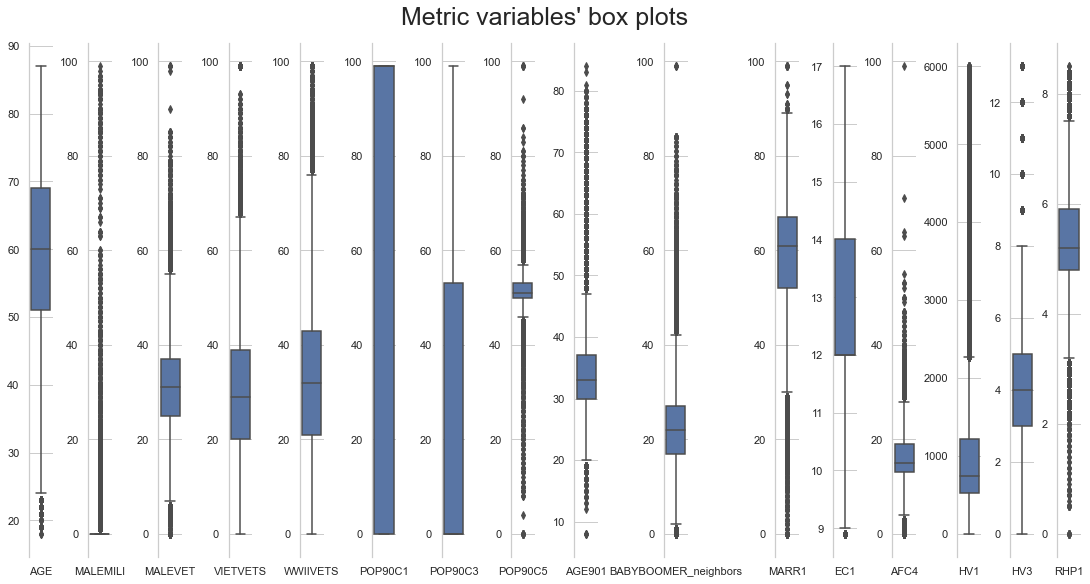

In [116]:
# Metric Variables Boxplots - part 1 
sns.set(style="whitegrid")

# Prepare dataframe layout
plot_data = selected_vars.reset_index().melt("CONTROLN")
plot_features = selected_vars.reset_index().drop("CONTROLN",1).columns

#Prepare figure layout
fig, axes = plt.subplots(1, len(plot_features[:16]), figsize=(15,8), constrained_layout=True)
    
# Draw the boxplots
for i in zip(axes, plot_features[:16]):
    sns.boxplot(x="variable", y="value", data=plot_data.loc[plot_data["variable"]==i[1]], ax=i[0])
    i[0].set_xlabel("")
    i[0].set_ylabel("")

# Finalize the plot
plt.suptitle("Metric variables' box plots - part 1", fontsize=25)
sns.despine(bottom=True)

plt.show()

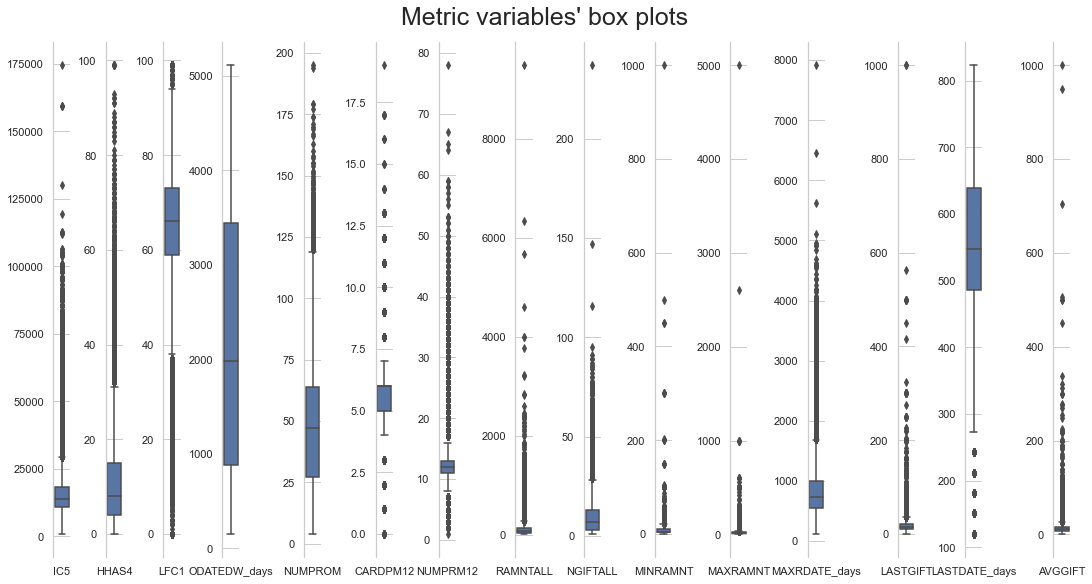

In [117]:
# Metric Variables Boxplots - part 2
sns.set(style="whitegrid")

# Prepare dataframe layout
plot_data = selected_vars.reset_index().melt("CONTROLN")
plot_features = selected_vars.reset_index().drop("CONTROLN",1).columns

#Prepare figure layout
fig, axes = plt.subplots(1, len(plot_features[16:]), figsize=(15,8), constrained_layout=True)
    
# Draw the boxplots
for i in zip(axes, plot_features[16:]):
    sns.boxplot(x="variable", y="value", data=plot_data.loc[plot_data["variable"]==i[1]], ax=i[0])
    i[0].set_xlabel("")
    i[0].set_ylabel("")

# Finalize the plot
plt.suptitle("Metric variables' box plots - part 2", fontsize=25)
sns.despine(bottom=True)

plt.show()

In [ ]:
# Metric Variables Histograms 
sns.set()

# Create individual axes 
fig, axes = plt.subplots(ceil(len(metric_vars.columns)/2), 2, figsize=(15, 900))
#plt.subplots_adjust(hspace = 0.18)

# Plot data
for ax, feat in zip(axes.flatten(), metric_vars.columns):
    ax.hist(metric_vars[feat])
    ax.set_title(feat, y = -0.16)
    
# Title
plt.suptitle("Metric variables' histograms", fontsize=25)
  
plt.show()

In [ ]:
# Metric Variables Correlation Matrix
def color_red_or_green(val):
    if val < -0.7:
        color = 'background-color: red'
    elif val > 0.7:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Checking correlations 
correlations = metric_vars.corr()
correlations.style.applymap(color_red_or_green)

In [ ]:
# Pairwise antes e depois, mas precisamos das variáveis escolhidas

In [ ]:
sns.set()

selected_metric_before = data_original[[]]

# Setting pairgrid
g = sns.PairGrid(selected_metric_df)

# Populating pairgrid
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=40)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise relationship of the selected metric variables - before Data Cleaning", fontsize=25)
plt.show()

In [ ]:
sns.set()

selected_metric_after = data[[]]

# Setting pairgrid
g = sns.PairGrid(selected_metric_df)

# Populating pairgrid
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=40)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise relationship of the selected metric variables - after Data Cleaning", fontsize=25)
plt.show()

# 11.

In [289]:
selected_vars_wo_lapsed = selected_vars_wo[data['LAPSED_OR_RECENT']=='1']
selected_vars_wo_nonlapsed = selected_vars_wo[data['LAPSED_OR_RECENT']=='0']

In [290]:
# Also, SEPARATE BETWEEN LAPSED_OR_RECENT AND THE REST
# Separate dataframe
data_social = selected_vars_wo_lapsed[social_features].copy()
data_eco = selected_vars_wo_lapsed[economic_features].copy()
data_donation = selected_vars_wo_lapsed[donation_features].copy()

KeyError: "['CARDPROM_AVG', 'CARDGIFT_AVG'] not in index"

**Encoding of the non-metric variables that were selected**

**Assess feature importance: Using the R²**

In [ ]:
# ... CODE HERE

In [ ]:
def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars